In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Exercice 1

In [2]:
omega=4*np.pi/10
u0=1
v0=2

# Stream lines calculating the stream functions
x=np.arange(-3,3,1)
y=np.arange(-5,5,1)
X,Y=np.meshgrid(x,y)

t=np.pi/3/omega
U=np.ones_like(X)*u0*np.cos(omega*t)
V=-np.ones_like(X)*v0*np.sin(omega*t)

In [3]:
%%latex
We look for:
\begin{equation}
\Psi(x,y,t)=C
\end{equation}
The relation to find streamlines is: 
\begin{eqnarray}
dx*v & = & dy*u\\
(x-x_0)v& = & (y-y_0)u\\
\end{eqnarray}
Assuming, that u and v are homegeneous in space, we have for the streamline that passes through point $x_0$,$y_0$
\begin{equation}
\Psi(x,y,t)=(y-y_0)u -(x-x_0)v
\end{equation}
Using this definition, streamlines leave the high $\Psi$ values of the left:
\begin{equation}
u=\frac{\partial\Psi}{\partial y},\quad  v=-\frac{\partial\Psi}{\partial x} 
\end{equation}
In practise streamfunctions are defined choosing a constant values atsome specific location.
Here we choose, $\Psi(x,y)=0$ at $x_0=0,y_0=0$

<IPython.core.display.Latex object>

In [4]:
x0,y0=0,0
Psi=(Y-y0)*U-(X-x0)*V #with Psi=0 at the origin à chaque fois

In [5]:
#Trajectory Equation
X0=0
Y0=0
t=np.linspace(0,2*np.pi/omega,100)
XP2=u0/omega*np.sin(omega*t)+X0
YP2=v0/omega*(np.cos(omega*t)-1)+Y0

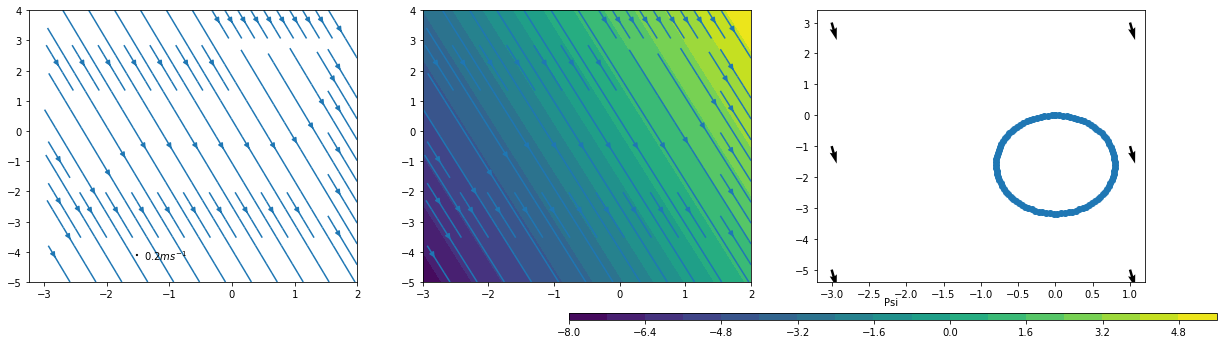

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
ax1.streamplot(X,Y,U,V)
ax2.streamplot(X,Y,U,V)
ctf=ax2.contourf(X,Y,Psi,20)
step=4
Q=ax3.quiver(X[::step,::step],Y[::step,::step],U[::step,::step],V[::step,::step],units='inches')
qk = ax3.quiverkey(Q, 0.2, 0.2, 0.1, r'$0.2 m s^{-1}$', labelpos='E',\
                   coordinates='figure')
ax3.scatter(XP2,YP2)

wi,hi  = 0.45,0.02
xc,yc  = 0.5,0.02
cbax    = fig.add_axes([xc,yc,wi,hi])
cb     = plt.colorbar(ctf,cbax,orientation='horizontal')
cb.set_label('Psi ',fontsize=10,labelpad=-40)
cb.ax.tick_params(labelsize=10)


# Exercice 7

## General form of the velocity gradient tensor for 2D flows 

In [8]:
%%latex
The velocity gradient tensor writes as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
\end{equation}
This tensor can be decomposed into a symmettric and antisymmetric part:
\begin{equation}\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
\frac{\partial u}{\partial x} + \frac{\partial u}{\partial x}  & \frac{\partial u}{\partial y} + \frac{\partial v}{\partial x} \\
\frac{\partial v}{\partial x} + \frac{\partial u}{\partial y}  & \frac{\partial v}{\partial y} + \frac{\partial v}{\partial y} 
\end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix}
0  & \frac{\partial u}{\partial y} - \frac{\partial v}{\partial x} \\
\frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}  & 0
\end{pmatrix}
=\overline{\overline{e}} + \frac{1}{2} \overline{\overline{ra}}
\end{equation}

$\overline{\overline{e}}$ (also sometimes refered to as $\overline{\overline{S}}$ or $\overline{\overline{D}}$) corresponds to the
symmetric part of the tensor of the velocity gradient. It is called the tensor of deformation. 
\begin{equation}
e_{ij}=\frac{1}{2}\left(\frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i}\right)
\end{equation}

The normal components of $\overline{\overline{e}}$ correspond to the linear strain rates.

The non-diagonal terms correspond to the shear strain rates. I, personnaly do not differentiate shear
and strain. I consider the shear to be the tangentional constraint (shear stress) that will create a deformation of the fluid element
with no change of volume.
\begin{equation}
\end{equation}

BUT, you may also decompose $\overline{\overline{e}}$:
\begin{equation}
e_{ij}= e_{ii} +(e_{ij}- e_{ii})
\end{equation}
which gives:
\begin{equation}
\overline{\overline{e}}
= 
\frac{1}{2}
\begin{pmatrix}
Div(\vec{v}) & 0 \\
0 & Div(\vec{v})
\end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix}
\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & 
\frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} \\
\frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & -\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
Div(\vec{v}) & 0 \\
0 & Div(\vec{v})
\end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix}
\sigma_{str} & \sigma_{sh} \\
\sigma_{sh} & -\sigma_{str}
\end{pmatrix},
\end{equation}
where 
\begin{equation}
\begin{array}{lcll}
\sigma_{sh}   & = & \frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & 
\mbox{is the total shear (cisaillement in french)}\\
\sigma_{str}  &= &\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & 
\mbox{is the pure strain (étirement in french) with  no volume change},\\
Div(\vec{v}) & = & \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} & 
\mbox{is the volumetric change rate with no deformation}
\end{array}
\end{equation}

$\overline{\overline{ra}}$ (also sometimes refered to as $\overline{\overline{r}}$ or $\overline{\overline{A}}$)
corresponds to the antisymmetric part of the tensor of the velocity gradient. It is called the tensor of rotation. 
\begin{equation}
ra_{ij}=\frac{1}{2}\left(\frac{\partial u_i}{\partial x_j} - \frac{\partial u_j}{\partial x_i}\right)
\end{equation}
The diagonal terms are zero, and the non diagonal terms ($r_{ij}, i\neq j$) correpond to angular rate of
rotation around axis of coordinate k ($k\neq i,j$). For 2D flows, you may only rotate along the third axis perpendicular
to the plane, and $\overline{\overline{ra}}$ writes as follows:
\begin{equation}
\overline{\overline{ra}} =
\begin{pmatrix}
0 & -\omega_3\\
\omega_3 & 0
\end{pmatrix},
\end{equation}
where $\omega_3$ is the vorticity (component of the curl of the velocity perpendicular to the plane of motion).
\begin{equation}
\zeta=\omega_3= \left(\frac{\partial v}{\partial x}- \frac{\partial u}{\partial y} \right)=2\Omega_3,
\end{equation}
where $\Omega_3$ is the rate of rotation around the z axis. 
\begin{equation}
\end{equation}
To conclude, the tensor representing the gradienbt of the velocity vector may be written as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
= 
\frac{1}{2}
\begin{pmatrix}
Div(\vec{v}) & 0 \\
0 & Div(\vec{v})
\end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix}
\sigma_{str} & \sigma_{sh} \\
\sigma_{sh} & -\sigma_{str}
\end{pmatrix}+
\frac{1}{2}
\begin{pmatrix}
0 & -\omega_3\\
\omega_3 & 0
\end{pmatrix}
\end{equation}


<IPython.core.display.Latex object>

## 1 : u=ax, v=ay - pure volumetric linear strain rate (no shape deformation)

In [9]:
%%latex
The velocity gradient tensor writes as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
a & 0\\
0 & a
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{array}{lclcl}
Div(\vec{v}) & = & \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} & = & 2a\\
\sigma_{sh}   & = & \frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & = & 0\\
\sigma_{str}  & = &\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & =& 0\\
\omega_3      & = & \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y} & = & 0
\end{array}
\end{equation}

<IPython.core.display.Latex object>

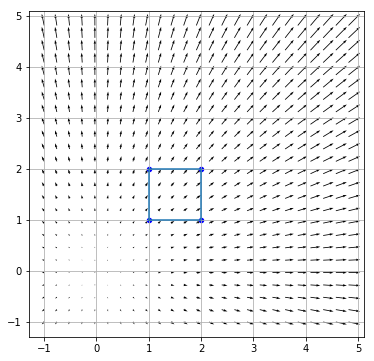

In [10]:
x=np.linspace(-1,+5,100)
y=np.linspace(-1,+5,100)
X,Y=np.meshgrid(x,y)

#Coordoinates at t=0
x0A,y0A=1,1
x0B,y0B=1,2
x0C,y0C=2,2
x0D,y0D=2,1


#Xp=np.concatenate()
a=0.1
b=a
u=a*X
v=b*Y

fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')
ax.plot([x0A,x0B,x0C,x0D,x0A],[y0A,y0B,y0C,y0D,y0A])
ax.grid(b=True)


### Pathline

In [11]:
%%latex
\begin{equation}
\begin{array}{lcl}
xp & = & xp_0 \exp(a(t-t_0)) \\
yp & = & yp_0 \exp(b(t-t_0))
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [12]:
def pathline(x0,y0,t0,t,a,b):
    xp=x0*np.exp(a*(t-t0))
    yp=y0*np.exp(b*(t-t0))
    return xp,yp


### Find tau 

In [13]:
%%latex
\begin{equation}
\begin{array}{lcl}
xp(\tau) & = 1.5 \\
xp_0 \exp(a(\tau-t_0)) & = & 1.5 \\ 
\tau & = & \frac{\ln\left(\frac{1.5}{xp_0}\right) }{a} +t_0
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [14]:
tau=np.log(1.5/x0A)/a
print("tau=",tau)

tau= 4.05465108108


In [15]:
#pathline
t=np.linspace(0,tau,50)
xAt,yAt=pathline(x0A,y0A,0,t,a,b)
xBt,yBt=pathline(x0B,y0B,0,t,a,b)
xCt,yACt=pathline(x0C,y0C,0,t,a,b)
xDt,yDt=pathline(x0D,y0D,0,t,a,b)

NameError: name 'xA' is not defined

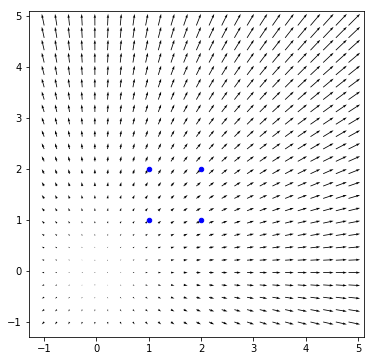

In [16]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
#ax.streamplot(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step])
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')
ax.plot([xA,xB,xC,xD,xA],[yA,yB,yC,yD,yA])

ax.grid(b=True)

ax.scatter(xAt[-1],yAt[-1],s=20,c='r')
ax.scatter(xBt[-1],yBt[-1],s=20,c='r')
ax.scatter(xCt[-1],yCt[-1],s=20,c='r')
ax.scatter(xDt[-1],yDt[-1],s=20,c='r')
ax.plot([xAt[-1],xBt[-1],xCt[-1],xDt[-1],xAt[-1]],[yAt[-1],yBt[-1],yCt[-1],yDt[-1],yAt[-1]])


## 2: u=ax, v=-ay - (no volume change + shape deformation ) = pure strain

In [17]:
%%latex
The velocity gradient tensor writes as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
a & 0\\
0 & -a
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{array}{lclcl}
Div(\vec{v}) & = & \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} & = & 0\\
\sigma_{sh}   & = & \frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & = & 0\\
\sigma_{str}  & = &\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & =& 2a\\
\omega_3      & = & \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y} & = & 0
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [18]:
#Xp=np.concatenate()
a=0.1
b=-a
u=a*X
v=b*Y

In [19]:
tau=np.log(1.5/x0A)/a
print("tau=",tau)

tau= 4.05465108108


In [20]:
#pathline
t=np.linspace(0,tau,50)
xAt,yAt=pathline(x0A,y0A,0,t,a,b)
xBt,yBt=pathline(x0B,y0B,0,t,a,b)
xCt,yCt=pathline(x0C,y0C,0,t,a,b)
xDt,yDt=pathline(x0D,y0D,0,t,a,b)

NameError: name 'xA' is not defined

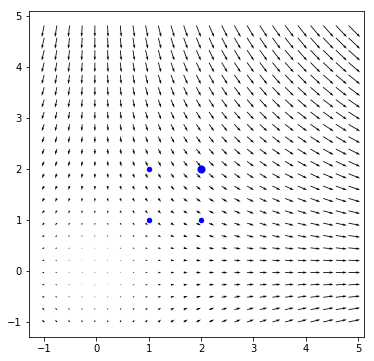

In [21]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
#ax.streamplot(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step])
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=50,c='b')
ax.scatter(x0D,y0D,s=20,c='b')
ax.plot([xA,xB,xC,xD,xA],[yA,yB,yC,yD,yA])

ax.grid(b=True)

ax.scatter(xAt[-1],yAt[-1],s=20,c='r')
ax.scatter(xBt[-1],yBt[-1],s=20,c='r')
ax.scatter(xCt[-1],yCt[-1],s=50,c='r')
ax.scatter(xDt[-1],yDt[-1],s=20,c='r')
ax.plot([xAt[-1],xBt[-1],xCt[-1],xDt[-1],xAt[-1]],[yAt[-1],yBt[-1],yCt[-1],yDt[-1],yAt[-1]])


## 3: u=ay, v=ax - (no volume change + no strain) = pure shear

In [22]:
%%latex
The velocity gradient tensor writes as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
0 & a\\
a & 0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{array}{lclcl}
Div(\vec{v}) & = & \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} & = & 0\\
\sigma_{sh}   & = & \frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & = & 2a\\
\sigma_{str}  & = &\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & =& 0\\
\omega_3      & = & \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y} & = & 0
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [23]:
#Xp=np.concatenate()
a=0.1
b=a
u=a*Y
v=b*X

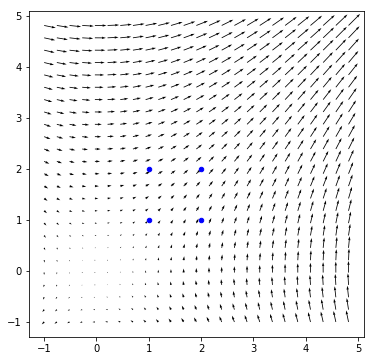

In [24]:
x=np.linspace(-1,+5,100)
y=np.linspace(-1,+5,100)
X,Y=np.meshgrid(x,y)

#Coordoinates at t=0
x0A,y0A=1,1
x0B,y0B=1,2
x0C,y0C=2,2
x0D,y0D=2,1


fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')

### Pathline 1

In [25]:
%%latex
Steady Flow implies streamlines and pathlines superimmposed
\begin{equation}
\begin{array}{lcl}
\frac{dx}{u} & = & \frac{dy}{v} \\
x dx & = & y dy \\
x^2 - x_0^2 & = & y^2 - y_0^2\\
y & = & \left( x^2 -x_0^2 \right)^{0.5} +y_0^2
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [26]:
def pathline_pure_shear(x0,y0,a,b):
    if ((( y0>0) &(b >0)) | ((y0<0)& (b<0) )):
        x=np.linspace(x0,x0+3,50) #the particle moves towards inbcreasing value of x
        # we add an arbitrary constabt to plot
    else:
        x=np.linspace(x0-3,x0,50)
    #print(x)
    y=(x**2-x0**2 +y0**2)**0.5
    return x,y
xAt1,yAt1=pathline_pure_shear(x0A,y0A,a,b)
xBt1,yBt1=pathline_pure_shear(x0B,y0B,a,b)
xCt1,yCt1=pathline_pure_shear(x0C,y0C,a,b)
xDt1,yDt1=pathline_pure_shear(x0D,y0D,a,b)

## Pathline 2

In [27]:
%%latex 
\begin{equation}
\left\{
\begin{array}{lcl}
u & =& ay\\
v & = & ax 
\end{array}
\right.
\quad
\left\{
\begin{array}{lclcl}
\frac{d^2 x}{dt^2} & = & \frac{Du}{Dt} & = & v\frac{\partial u}{\partial y} & = & a^2 x\\
\frac{d^2 y}{dt^2} & = &  \frac{Dv}{Dt} & = & u\frac{\partial v}{\partial x} & = & a^2 y
\end{array}
\right.
\quad
\left\{
\begin{array}{lcl}
\frac{d^2 x}{dt^2} - a^2 x & = & 0\\
\frac{d^2 y}{dt^2} - a^2 y & = & 0
\end{array}
\right. 
\quad
CI:\left\{
\begin{array}{lcl}
x(t_0) & = & x_0\\
u(t_0) & = & a y_0
\end{array}
\right. 
\quad
CI:\left\{
\begin{array}{lcl}
y(t_0) & = & y_0\\
v(t_0) & = & a x_0
\end{array}
\right.                 
\end{equation}

\begin{equation}
\left\{
\begin{array}{lcl}
x(t) & = & \frac{x_0+y_0}{2}\exp(a(t-t_0))+ \frac{x_0-y_0}{2}\exp(-a(t-t_0)) \\
x(t) & = & \frac{x_0+y_0}{2}\exp(a(t-t_0))- \frac{x_0-y_0}{2}\exp(-a(t-t_0)) 
\end{array}\right.
\end{equation}                    

<IPython.core.display.Latex object>

# Finding Tau

In [28]:
%%latex
Finding $\tau$:
\begin{equation}
\left\{
\begin{array}{lcl}
x(\tau) & = &x_0 + 0.5\\
y(\tau) & = &\left((x_0 +0.5)^2-x_0^2 +y_0^2\right)^{0.5}
\end{array}
\right.
\end{equation}


\begin{equation}
    \begin{array}{lcl}
x(\tau)+y(\tau)  & =  &(x_0+y_0)\exp(a(\tau-t_0)) \\
\log\left(\frac{x(\tau)+y(\tau)}{x_0+y_0)}\right) & = & a(\tau-t_0) \\
\tau & = & \frac{1}{a}\log\left(\frac{x(\tau)+y(\tau)}{x_0+y_0)}\right) + t_0
\end{array}
    \end{equation}

<IPython.core.display.Latex object>

In [29]:
xtau=x0A+.5
ytau=(xtau**2-x0A**2*y0A**2)**0.5
tau=1/a*np.log((xtau+ytau)/(x0A+y0A))
print(tau)

t=np.linspace(0,tau,50)

2.69276469559


In [30]:
#t to be defined...
def pathline_pure_shear_2(x0,y0,t,t0,a):
    x=0.5*(x0+y0)*np.exp(a*(t-t0)) + 0.5*(x0-y0)*np.exp(-a*(t-t0))
    y=0.5*(x0+y0)*np.exp(a*(t-t0)) - 0.5*(x0-y0)*np.exp(-a*(t-t0))
    return x,y
xAt2,yAt2=pathline_pure_shear_2(x0A,y0A,t,0,a)
xBt2,yBt2=pathline_pure_shear_2(x0B,y0B,t,0,a)
xCt2,yCt2=pathline_pure_shear_2(x0C,y0C,t,0,a)
xDt2,yDt2=pathline_pure_shear_2(x0D,y0D,t,0,a)

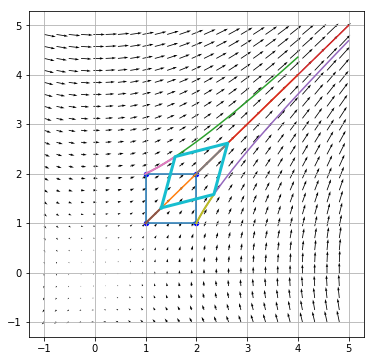

In [31]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')
ax.plot([x0A,x0B,x0C,x0D,x0A],[y0A,y0B,y0C,y0D,y0A])

ax.plot(xAt1,yAt1)
ax.plot(xBt1,yBt1)
ax.plot(xCt1,yCt1)
ax.plot(xDt1,yDt1)


ax.plot(xAt2,yAt2,linewidth=2)
ax.plot(xBt2,yBt2,linewidth=2)
ax.plot(xCt2,yCt2,linewidth=2)
ax.plot(xDt2,yDt2,linewidth=2)

ax.plot([xAt2[-1],xBt2[-1],xCt2[-1],xDt2[-1],xAt2[-1]],[yAt2[-1],yBt2[-1],yCt2[-1],yDt2[-1],yAt2[-1]],linewidth=3)

ax.grid(b=True)

## 4. u=-ay, v=ax - (no volume change + no strain + no shear) = pure rotation

In [32]:
%%latex
The velocity gradient tensor writes as follows:
\begin{equation}
grad(\vec{u})=
\begin{pmatrix}
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y}\\
\frac{\partial v}{\partial x} & \frac{\partial v}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
0 & -a\\
a & 0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{array}{lclcl}
Div(\vec{v}) & = & \frac{\partial u}{\partial x}+\frac{\partial v}{\partial y} & = & 0\\
\sigma_{sh}   & = & \frac{\partial u}{\partial y}+\frac{\partial v}{\partial x} & = & 0\\
\sigma_{str}  & = &\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} & =& 0\\
\omega_3      & = & \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y} & = & 2a
\end{array}
\end{equation}

<IPython.core.display.Latex object>

In [33]:
#Xp=np.concatenate()
a=0.1
b=a
u=-a*Y
v=a*X

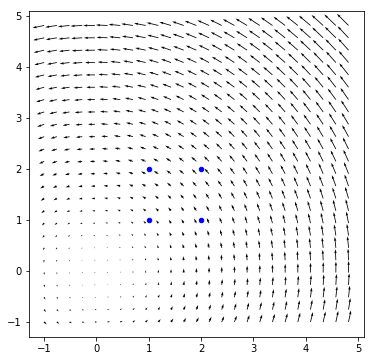

In [34]:
x=np.linspace(-1,+5,100)
y=np.linspace(-1,+5,100)
X,Y=np.meshgrid(x,y)

#Coordoinates at t=0
x0A,y0A=1,1
x0B,y0B=1,2
x0C,y0C=2,2
x0D,y0D=2,1


fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')

In [35]:
%%latex
\begin{equation}
\left\{
\begin{array}{lclclcl}
u_r & = & u \cos(\theta) + v\sin(\theta) & = & -a r \sin(\theta)\cos(\theta) + a r \cos(\theta)\sin(\theta) & = & 0\\
u_\theta & = & -u\sin(\theta) + v\cos(\theta) & = & +a r \sin^2(\theta) + a r \cos^2(\theta) & = & ar
\end{array}
\right.
\end{equation}
This is an axsymetric flow with $\omega=a$
\begin{equation}
\theta(t)=\omega t + \theta(t_0)
\end{equation}

<IPython.core.display.Latex object>

In [36]:
def pathline_pure_rotation(x0,y0,t,t0,omega):
    theta0=np.arctan2(y0,x0)
    theta=omega*t+theta0
    r=np.sqrt(x0**2+y0**2)
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y

In [37]:
xAt2,yAt2=pathline_pure_rotation(x0A,y0A,t,0,a)
xBt2,yBt2=pathline_pure_rotation(x0B,y0B,t,0,a)
xCt2,yCt2=pathline_pure_rotation(x0C,y0C,t,0,a)
xDt2,yDt2=pathline_pure_rotation(x0D,y0D,t,0,a)

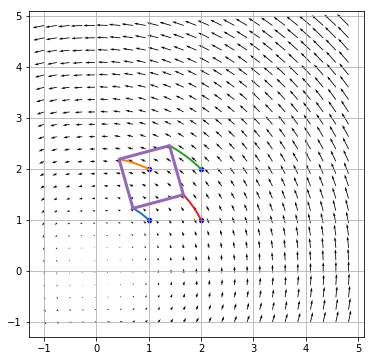

In [38]:
x=np.linspace(-1,+5,100)
y=np.linspace(-1,+5,100)
X,Y=np.meshgrid(x,y)

#Coordoinates at t=0
x0A,y0A=1,1
x0B,y0B=1,2
x0C,y0C=2,2
x0D,y0D=2,1


fig,ax=plt.subplots(1,1,figsize=(6,6))
step=4
ax.quiver(X[::step,::step],Y[::step,::step],u[::step,::step],v[::step,::step],units='inches',scale=3)
ax.scatter(x0A,y0A,s=20,c='b')
ax.scatter(x0B,y0B,s=20,c='b')
ax.scatter(x0C,y0C,s=20,c='b')
ax.scatter(x0D,y0D,s=20,c='b')

ax.plot(xAt2,yAt2,linewidth=2)
ax.plot(xBt2,yBt2,linewidth=2)
ax.plot(xCt2,yCt2,linewidth=2)
ax.plot(xDt2,yDt2,linewidth=2)

ax.plot([xAt2[-1],xBt2[-1],xCt2[-1],xDt2[-1],xAt2[-1]],[yAt2[-1],yBt2[-1],yCt2[-1],yDt2[-1],yAt2[-1]],linewidth=3)

ax.grid(b=True)